# Intro notebook
The purpose of this notebook is to connect to a local database that we created by loading CSV files into that database.
Copy / paste this notebook into other places to add / delete cells and add new analysis.

In [37]:
import os
from pathlib import Path
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pygwalker as pyg

In [3]:
# Define your database file path (SQLite example)
rel_db_path = Path.cwd().parent.parent / 'raw_data' / 'nfl' / 'src_code' / 'nfl.db'
db_file_path = rel_db_path.resolve()
engine = create_engine(f'sqlite:///{db_file_path}')

In [4]:
%load_ext sql

In [5]:
%sql sqlite:///{db_file_path}

In [51]:
%%sql
SELECT *
FROM nfl_adp_hype
ORDER BY actual_pos_finish ASC  
LIMIT 20

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,year,yid,fantasy_pos,adp_pos,adp_pos_n,actual_pos_finish,expect_adp_ppg,prior_year_fppg,hype,actual_fppg_ppr,performance
aaron dobson,2016,None,WR,WR175,175,1,1.37,0,1.37,None,0
aaron rodgers,2016,0,QB,QB2,2,1,22.62,0,22.62,23.75,1.13
leveon bell,2016,0,RB,RB6,6,1,18.55,0,18.55,26.45,7.9
jordan reed,2016,0,TE,TE2,2,1,15.59,0,15.59,14.05,-1.54
antonio brown,2016,0,WR,WR1,1,1,23.2,0,23.2,20.49,-2.71
deshaun watson,2017,0,QB,QB24,24,1,14.83,0,14.83,24.13,9.3
todd gurley,2017,1,RB,RB10,10,1,16.13,12.39,3.74,25.55,9.42
rob gronkowski,2017,1,TE,TE1,1,1,17.05,12.13,4.92,16.24,-0.81
antonio brown,2017,1,WR,WR1,1,1,23.2,20.49,2.71,22.16,-1.04
patrick mahomes,2018,1,QB,QB15,15,1,17.03,10.4,6.63,26.07,9.04


# Let's update the ADP graph to parse out "expectation"

In [47]:
exp_q = """
SELECT
    cleaned_player,
    year,
    fantasy_pos,
    adp_pos,
    expect_adp_ppg,
    prior_year_fppg,
    hype,
    IIF(hype > 0, 'TRUE', 'FALSE') AS perf_color
FROM nfl_adp_hype
WHERE 1=1
    AND year != '2016'
    AND fantasy_pos IN ('QB', 'RB', 'WR', 'TE')
    AND adp_pos IS NOT NULL 
    AND adp_pos NOT LIKE 'LB%'
    AND (
        (fantasy_pos IN ('RB', 'WR') AND adp_pos_n <=30)
        OR (fantasy_pos IN ('QB', 'TE') AND adp_pos_n <=15)
        )
"""

In [48]:
%%sql
$exp_q
ORDER BY adp_pos_n ASC 
LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,year,fantasy_pos,adp_pos,expect_adp_ppg,prior_year_fppg,hype,perf_color
ceedee lamb,2024,WR,WR1,23.2,23.72,-0.52,FALSE
christian mccaffrey,2024,RB,RB1,26.09,24.46,1.63,TRUE
josh allen,2024,QB,QB1,25.09,23.09,2.0,TRUE
sam laporta,2024,TE,TE1,17.05,14.08,2.97,TRUE
aaron rodgers,2017,QB,QB1,25.09,23.75,1.34,TRUE
david johnson,2017,RB,RB1,26.09,25.49,0.6,TRUE
rob gronkowski,2017,TE,TE1,17.05,12.13,4.92,TRUE
antonio brown,2017,WR,WR1,23.2,20.49,2.71,TRUE
aaron rodgers,2018,QB,QB1,25.09,18.51,6.58,TRUE
todd gurley,2018,RB,RB1,26.09,25.55,0.54,TRUE


In [49]:
%%sql df <<
$exp_q
ORDER BY year ASC, adp_pos_n ASC 

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.
Returning data to local variable df


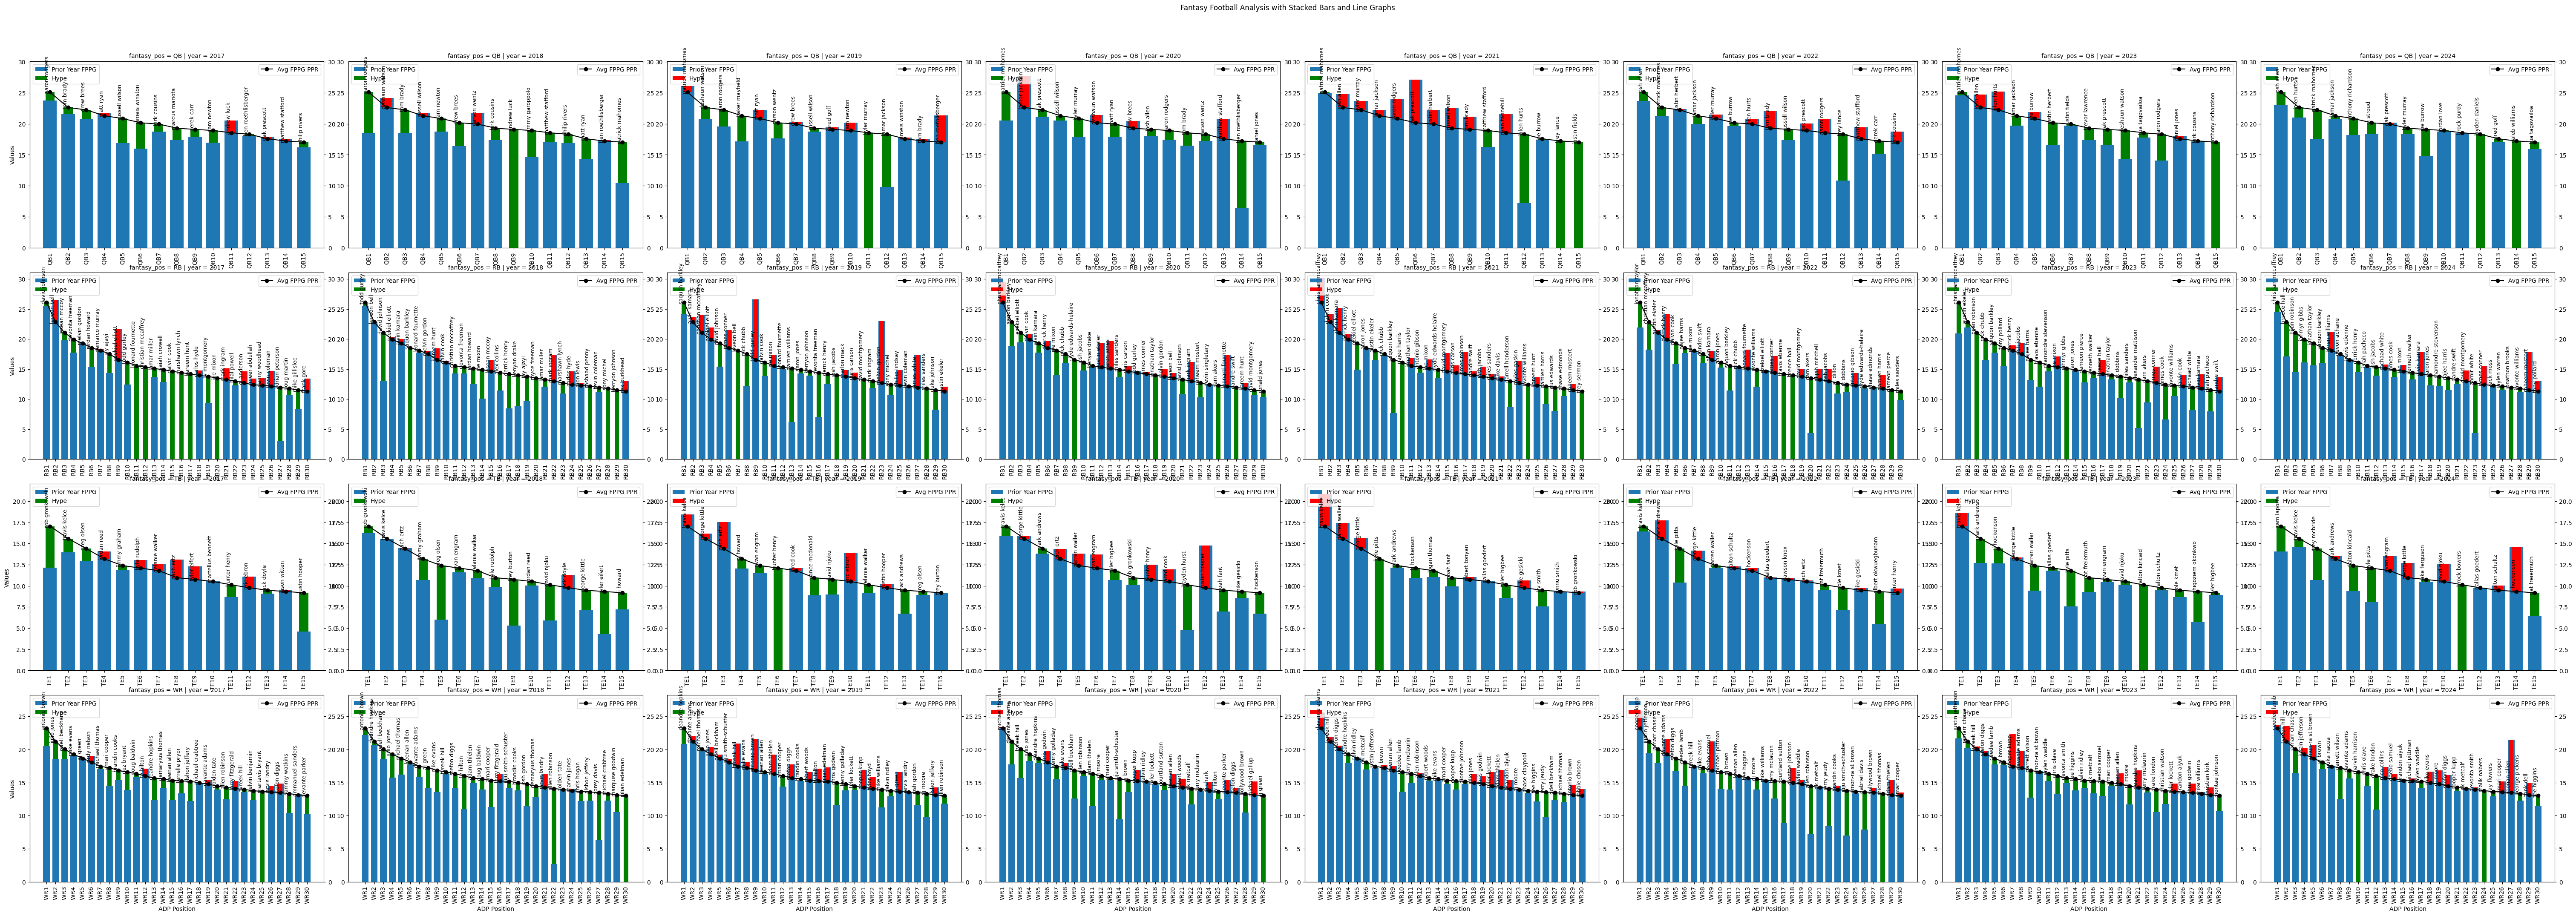

In [50]:
data = pd.DataFrame(df)

# Create the FacetGrid
g = sns.FacetGrid(data, row='fantasy_pos', col='year', height=5, aspect=1.5, sharex=False, sharey=False)

# Loop through each subplot
for (fantasy_pos, year), group in data.groupby(['fantasy_pos', 'year']):
    ax = g.axes[g.row_names.index(fantasy_pos), g.col_names.index(year)]
    
    # Plot stacked bar chart
    prior_year_fppg_bar_width = 0.75
    hype_width = 0.5
    perf_width = 0.25
    prior_year_fppg_bar = ax.bar(group['adp_pos'], group['prior_year_fppg'], width=prior_year_fppg_bar_width, label='Prior Year FPPG')

    hype_bar_colors = group['perf_color'].map({'TRUE': 'green', 'FALSE': 'red'})
    hype_bar = ax.bar(group['adp_pos'], group['hype'], bottom=group['prior_year_fppg'], width=hype_width, label='Hype', color=hype_bar_colors)

    # Plot line graph
    ax2 = ax.twinx()
    line = ax2.plot(group['adp_pos'], group['expect_adp_ppg'], color='black', marker='o', label='Avg FPPG PPR')

    # Add data labels for the line chart
    for i in range(group.shape[0]):
        adp_pos = group['adp_pos'].iloc[i]
        avg_fppg_ppr = group['expect_adp_ppg'].iloc[i]
        cleaned_player = group['cleaned_player'].iloc[i]
        
        if pd.notna(avg_fppg_ppr):
            ax2.text(adp_pos, avg_fppg_ppr, cleaned_player, fontsize=9, ha='right', rotation=90)
    
    # Combine the limits of the left and right y-axes
    y_min = 0
    y_max = group['expect_adp_ppg'].max() + 5
    ax.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    # Add legends
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Customize the plot
g.set_axis_labels('ADP Position', 'Values')
g.set_xticklabels(rotation=90)
g.fig.suptitle('Fantasy Football Analysis with Stacked Bars and Line Graphs', y=1.05)

plt.show()


# Most hyped rookies

In [108]:
m_hype_r = """
SELECT
    cleaned_player,
    year,
    fantasy_pos,
    adp_pos,
    adp_pos_n,
    actual_pos_finish,
    prior_year_fppg,
    hype,
    actual_fppg_ppr,
    performance,
    hype_rank,
    IIF(performance > 0, 'TRUE', 'FALSE') AS perf_color
FROM (
    SELECT
        *,
        ROW_NUMBER() OVER(PARTITION BY fantasy_pos ORDER BY hype DESC) AS hype_rank
    FROM nfl_adp_hype
    WHERE 1=1
        AND year != '2016'
        AND fantasy_pos IN ('QB', 'RB', 'WR', 'TE')
        AND adp_pos IS NOT NULL 
        AND adp_pos NOT LIKE 'LB%'
        AND yid = 0
    )
WHERE hype_rank <= 15
"""

In [109]:
%%sql
$m_hype_r
order by fantasy_pos, year ASC, hype_rank ASC

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,year,fantasy_pos,adp_pos,adp_pos_n,actual_pos_finish,prior_year_fppg,hype,actual_fppg_ppr,performance,hype_rank,perf_color
deshaun watson,2017,QB,QB24,24,1,0,14.83,24.13,9.3,11,TRUE
mitchell trubisky,2017,QB,QB28,28,38,0,13.84,11.21,-2.63,13,FALSE
kyler murray,2019,QB,QB11,11,12,0,18.54,17.83,-0.71,1,FALSE
dwayne haskins,2019,QB,QB28,28,42,0,13.84,8.52,-5.32,14,FALSE
joe burrow,2020,QB,QB16,16,19,0,16.72,17.37,0.65,5,TRUE
tua tagovailoa,2020,QB,QB28,28,31,0,13.84,13.55,-0.29,15,FALSE
trey lance,2021,QB,QB14,14,41,0,17.22,10.82,-6.4,2,FALSE
justin fields,2021,QB,QB15,15,43,0,17.03,10.57,-6.46,3,FALSE
trevor lawrence,2021,QB,QB20,20,37,0,15.9,11.71,-4.19,6,FALSE
zach wilson,2021,QB,QB21,21,38,0,15.68,11.68,-4.0,9,FALSE


In [96]:
%%sql df <<
$m_hype_r
order by fantasy_pos, year ASC, hype_rank ASC

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.
Returning data to local variable df


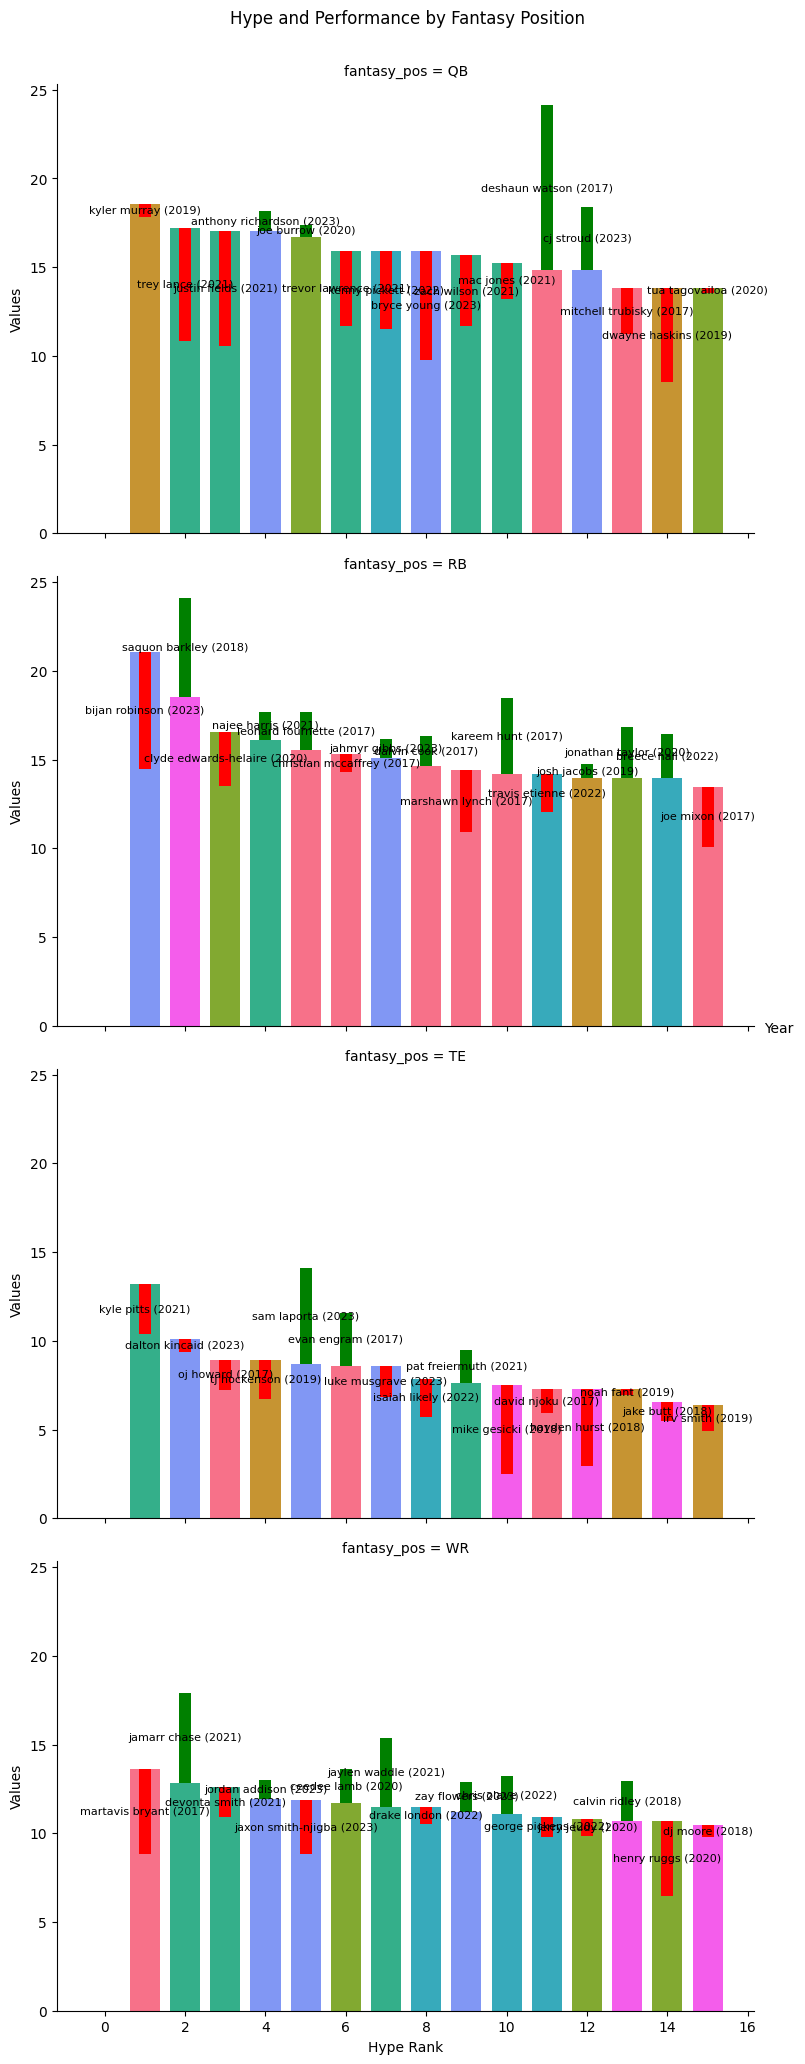

In [102]:
# Example data (replace df with your actual DataFrame)
data = pd.DataFrame(df)

# Map each unique year to a color
unique_years = data['year'].unique()
year_to_color = {year: color for year, color in zip(unique_years, sns.color_palette("husl", len(unique_years)))}

# Create the FacetGrid
g = sns.FacetGrid(data, row='fantasy_pos', height=5, aspect=1.5)

hype_width = 0.75
perf_width = 0.3

# Function to plot each facet
def plot_facet(data, **kwargs):
    ax = plt.gca()
    bars = []
    
    # Plot the hype bars
    hype_bars = ax.bar(data['hype_rank'], data['hype'], color=[year_to_color[year] for year in data['year']], width=hype_width)
    bars.append(hype_bars)
    
    # Plot the performance bars on top of the hype bars
    perf_bars = ax.bar(data['hype_rank'], data['performance'], bottom=data['hype'], color=data['perf_color'].map({'TRUE': 'green', 'FALSE': 'red'}), width=perf_width)
    bars.append(perf_bars)
    
    # Annotate each bar with cleaned_player + year
    for hype_bar, perf_bar, (idx, row) in zip(hype_bars, perf_bars, data.iterrows()):
        ax.text(perf_bar.get_x() + perf_bar.get_width() / 2, hype_bar.get_height() + perf_bar.get_height() / 2,
                f"{row['cleaned_player']} ({row['year']})", ha='center', va='center', fontsize=8, color='black')
    
    return bars

# Map the plot function to the FacetGrid
g.map_dataframe(plot_facet)

# Add legend for the year color palette
for year, color in zip(data['year'].unique(), year_palette):
    g.axes[0, 0].bar(0, 0, color=color, label=year)

g.add_legend(title='Year')

# Customize the plot
g.set_axis_labels('Hype Rank', 'Values')
g.fig.suptitle('Hype and Performance by Fantasy Position', y=1.02)
plt.show()


In [117]:
%%sql
WITH base AS ($m_hype_r)
SELECT
    fantasy_pos,
    ROUND(AVG(adp_pos_n),2) AS avg_draft_pos_n,
    ROUND(MIN(performance),2) AS worst_perf,
    ROUND(MAX(performance),2) AS best_perf,
    ROUND(AVG(performance),2) AS avg_perf,
    ROUND(AVG(actual_fppg_ppr),2) AS avg_fppg_ppr
FROM base
GROUP BY 1

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


fantasy_pos,avg_draft_pos_n,worst_perf,best_perf,avg_perf,avg_fppg_ppr
QB,20.4,-6.46,9.3,-1.85,13.9
RB,13.53,-6.59,5.56,0.19,15.59
TE,19.53,-5.0,5.36,-0.98,7.34
WR,40.33,-4.8,5.07,0.04,11.6


# What about hyped players that aren't rookies?

In [192]:
m_hype_a = """
SELECT
    *,
    ROW_NUMBER() OVER(PARTITION BY fantasy_pos ORDER BY expect_adp_ppg DESC) AS graph_order,
    IIF(performance > 0, 'TRUE', 'FALSE') AS perf_color
FROM (
    SELECT
        *,
        ROW_NUMBER() OVER(PARTITION BY fantasy_pos ORDER BY hype DESC) AS hype_rank
    FROM nfl_adp_hype
    WHERE 1=1
        AND year != '2016'
        AND fantasy_pos IN ('QB', 'RB', 'WR', 'TE')
        AND adp_pos IS NOT NULL 
        AND adp_pos NOT LIKE 'LB%'
        AND yid != 0
        AND prior_year_fppg > 1
    )
WHERE hype_rank <= 40
"""

In [193]:
%%sql
$m_hype_a
order by fantasy_pos, expect_adp_ppg DESC 
limit 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,year,yid,fantasy_pos,adp_pos,adp_pos_n,actual_pos_finish,expect_adp_ppg,prior_year_fppg,hype,actual_fppg_ppr,performance,hype_rank,graph_order,perf_color
aaron rodgers,2018,2,QB,QB1,1,9,25.09,18.51,6.58,19.54,-5.55,10,1,FALSE
patrick mahomes,2020,3,QB,QB1,1,3,25.09,20.5,4.59,24.96,-0.13,20,2,FALSE
tom brady,2018,2,QB,QB3,3,18,22.24,18.49,3.75,17.58,-4.66,32,3,FALSE
baker mayfield,2019,1,QB,QB4,4,28,21.29,17.15,4.14,14.33,-6.96,28,4,FALSE
russell wilson,2017,1,QB,QB5,5,2,20.84,16.88,3.96,21.74,0.9,30,5,TRUE
kyler murray,2020,1,QB,QB5,5,6,20.84,17.83,3.01,23.67,2.83,39,6,TRUE
jameis winston,2017,1,QB,QB6,6,18,20.16,16.01,4.15,15.52,-4.64,27,7,FALSE
drew brees,2018,2,QB,QB6,6,7,20.16,16.41,3.75,20.33,0.17,31,8,TRUE
justin herbert,2023,3,QB,QB6,6,12,20.16,16.55,3.61,18.02,-2.14,36,9,FALSE
deshaun watson,2023,6,QB,QB10,10,26,18.91,14.27,4.64,14.47,-4.44,19,10,FALSE


In [194]:
%%sql df <<
$m_hype_a

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.
Returning data to local variable df


In [195]:
# Example data (replace df with your actual DataFrame)
data = pd.DataFrame(df)

In [196]:
pyg.walk(data)

Box(children=(HTML(value='\n<div id="ifr-pyg-00061d54f14db964IeLAulozPaU0CGkd" style="height: auto">\n    <hea…

In [167]:
m_hype_a_results = """
SELECT
    *,
    IIF(performance > 0, 'TRUE', 'FALSE') AS perf_color
FROM (
    SELECT
        *,
        ROW_NUMBER() OVER(PARTITION BY fantasy_pos ORDER BY hype DESC) AS hype_rank
    FROM nfl_adp_hype
    WHERE 1=1
        AND year != '2016'
        AND fantasy_pos IN ('QB', 'RB', 'WR', 'TE')
        AND adp_pos IS NOT NULL 
        AND adp_pos NOT LIKE 'LB%'
        AND yid != 0
        AND prior_year_fppg > 1
    )
WHERE hype_rank <= 20
"""

In [175]:
%%sql
WITH base AS ($m_hype_a_results)
SELECT *, ROUND(hype / expect_adp_ppg,2)
FROM base
limit 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,year,yid,fantasy_pos,adp_pos,adp_pos_n,actual_pos_finish,expect_adp_ppg,prior_year_fppg,hype,actual_fppg_ppr,performance,hype_rank,perf_color,"ROUND(hype / expect_adp_ppg,2)"
jordan love,2023,2,QB,QB22,22,6,15.23,2.93,12.3,18.77,3.54,1,TRUE,0.81
jalen hurts,2021,1,QB,QB12,12,7,18.31,7.27,11.04,20.81,2.5,2,TRUE,0.6
ben roethlisberger,2020,4,QB,QB14,14,15,17.22,6.35,10.87,17.81,0.59,3,TRUE,0.63
lamar jackson,2019,1,QB,QB12,12,1,18.31,9.84,8.47,27.71,9.4,4,TRUE,0.46
jimmy garoppolo,2017,1,QB,QB26,26,20,14.3,6.0,8.3,14.65,0.35,5,TRUE,0.58
cam newton,2020,4,QB,QB19,19,18,16.06,8.35,7.71,17.4,1.34,6,TRUE,0.48
trey lance,2022,1,QB,QB12,12,56,18.31,10.82,7.49,6.25,-12.06,7,FALSE,0.41
mike glennon,2017,1,QB,QB36,36,45,11.36,4.5,6.86,8.43,-2.93,8,FALSE,0.6
patrick mahomes,2018,1,QB,QB15,15,1,17.03,10.4,6.63,26.07,9.04,9,TRUE,0.39
aaron rodgers,2018,2,QB,QB1,1,9,25.09,18.51,6.58,19.54,-5.55,10,FALSE,0.26


# What about the LEAST hyped players?

In [129]:
l_hype_a = """
SELECT
    *,
    IIF(performance > 0, 'TRUE', 'FALSE') AS perf_color
FROM (
    SELECT
        *,
        ROW_NUMBER() OVER(PARTITION BY fantasy_pos ORDER BY hype ASC) AS hype_rank
    FROM nfl_adp_hype
    WHERE 1=1
        AND year != '2016'
        AND fantasy_pos IN ('QB', 'RB', 'WR', 'TE')
        AND adp_pos IS NOT NULL 
        AND adp_pos NOT LIKE 'LB%'
        AND yid != 0
        AND prior_year_fppg > 1
    )
WHERE hype_rank <= 15
"""

In [130]:
%%sql
$l_hype_a
AND HYPE_RANK <=5

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


cleaned_player,year,yid,fantasy_pos,adp_pos,adp_pos_n,actual_pos_finish,expect_adp_ppg,prior_year_fppg,hype,actual_fppg_ppr,performance,hype_rank,perf_color
blaine gabbert,2018,2,QB,QB60,60,51,1.98,12.32,-10.34,4.13,2.15,1,TRUE
jameis winston,2020,4,QB,QB40,40,75,10.2,19.09,-8.89,0.6,-9.6,2,FALSE
ryan fitzpatrick,2019,3,QB,QB32,32,20,12.64,20.73,-8.09,16.1,3.46,3,TRUE
dak prescott,2021,5,QB,QB6,6,8,20.16,27.12,-6.96,20.04,-0.12,4,FALSE
josh mccown,2018,2,QB,QB40,40,49,10.2,15.8,-5.6,5.2,-5.0,5,FALSE
marshawn lynch,2019,2,RB,RB112,112,44,1.5,13.17,-11.67,9.4,7.9,1,TRUE
kareem hunt,2019,2,RB,RB41,41,26,9.42,20.93,-11.51,12.68,3.26,2,TRUE
melvin gordon,2019,3,RB,RB23,23,15,12.68,22.96,-10.28,15.07,2.39,3,TRUE
todd gurley,2019,3,RB,RB9,9,17,16.56,26.58,-10.02,14.63,-1.93,4,FALSE
darren sproles,2019,3,RB,RB117,117,90,1.21,10.17,-8.96,2.83,1.62,5,TRUE


In [197]:
d = %sql $l_hype_a
lhdf = pd.DataFrame(d)
pyg.walk(lhdf)

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


Box(children=(HTML(value='\n<div id="ifr-pyg-00061d551b523cd9guzdwG9qTFRIlm1Y" style="height: auto">\n    <hea…

# What about players in the "middle" not hyped or falling off?

Notes

Avoid rookie qbs, they really don't do well
Draft rookie RBs and WRs, they perform above draft cost

What about non-rookies that are very hyped up?
Also look at how good we are at predicting a drop off
Are we good at predicting drop off for players that are top finishers vs middle finishers?


Then we do a notebook on performance of those picks


Facet rows:
Facet columns:
X axis:
Y axis:
Color:
